In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv")
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [3]:
df['PH-121'].unique()

array(['B-', 'A', 'D', 'A-', 'B+', 'B', 'C+', 'C', 'C-', 'D+', 'WU', 'A+',
       'F'], dtype=object)

In [4]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [5]:
df.shape

(571, 43)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [8]:
df.isnull().sum().sum()

425

In [9]:
df.dropna(inplace=True)

We drop the rows that have null values because it will create skewness in the data by false data filling, as we cannot fill grades without knowing it.

In [10]:
df.shape

(417, 43)

In [11]:
# Checking for null values again
df.isnull().sum().sum()

0

As there is no null values we can carry forward working on data.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   417 non-null    object 
 1   PH-121     417 non-null    object 
 2   HS-101     417 non-null    object 
 3   CY-105     417 non-null    object 
 4   HS-105/12  417 non-null    object 
 5   MT-111     417 non-null    object 
 6   CS-105     417 non-null    object 
 7   CS-106     417 non-null    object 
 8   EL-102     417 non-null    object 
 9   EE-119     417 non-null    object 
 10  ME-107     417 non-null    object 
 11  CS-107     417 non-null    object 
 12  HS-205/20  417 non-null    object 
 13  MT-222     417 non-null    object 
 14  EE-222     417 non-null    object 
 15  MT-224     417 non-null    object 
 16  CS-210     417 non-null    object 
 17  CS-211     417 non-null    object 
 18  CS-203     417 non-null    object 
 19  CS-214     417 non-null    object 
 20  EE-217    

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CGPA,417.0,2.990386,0.578246,1.708,2.603,3.033,3.452,3.985


In [14]:
df['CGPA'].unique()

array([2.205, 2.008, 3.608, 1.906, 3.448, 3.026, 2.957, 3.043, 3.358,
       3.247, 2.681, 3.281, 2.792, 3.523, 3.443, 2.777, 3.248, 1.787,
       3.572, 3.483, 2.246, 2.956, 2.953, 3.586, 3.475, 2.228, 3.44 ,
       2.188, 3.195, 2.294, 3.133, 3.22 , 3.112, 3.16 , 3.019, 3.164,
       3.332, 2.165, 3.7  , 3.033, 2.696, 2.851, 3.058, 2.069, 1.996,
       3.897, 3.848, 3.404, 2.254, 2.655, 3.106, 2.793, 3.023, 3.01 ,
       3.4  , 1.899, 3.168, 2.57 , 2.564, 2.468, 3.769, 2.999, 2.768,
       2.822, 3.189, 2.715, 3.578, 3.49 , 2.805, 3.458, 2.34 , 3.252,
       2.683, 3.378, 3.295, 3.193, 3.647, 2.815, 2.171, 3.761, 2.763,
       2.938, 2.06 , 2.378, 2.861, 2.363, 2.084, 1.89 , 3.861, 1.805,
       3.925, 3.919, 3.258, 3.963, 2.396, 3.772, 1.768, 3.176, 3.335,
       3.758, 3.208, 1.845, 3.946, 2.3  , 3.759, 3.516, 2.087, 3.137,
       2.011, 2.566, 1.993, 3.334, 2.056, 2.552, 2.028, 2.58 , 3.651,
       2.928, 2.659, 3.174, 3.03 , 2.208, 2.698, 2.823, 2.407, 2.379,
       2.579, 2.711,

In [15]:
df['CGPA'].sort_values(ascending=False)

427    3.985
498    3.970
98     3.963
499    3.949
107    3.946
       ...  
570    1.753
138    1.749
210    1.719
136    1.714
139    1.708
Name: CGPA, Length: 417, dtype: float64

In [16]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [17]:
df.skew().sort_values()

CGPA   -0.326574
dtype: float64

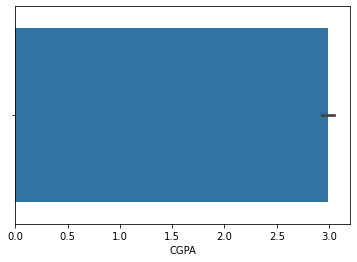

In [18]:
sns.barplot(df['CGPA'])
plt.show()

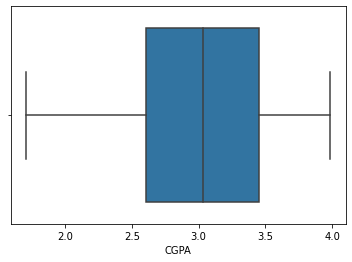

In [19]:
sns.boxplot(df['CGPA'])
plt.show()

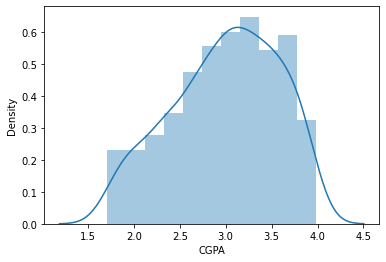

In [20]:
sns.distplot(df['CGPA'])
plt.show()

<AxesSubplot:>

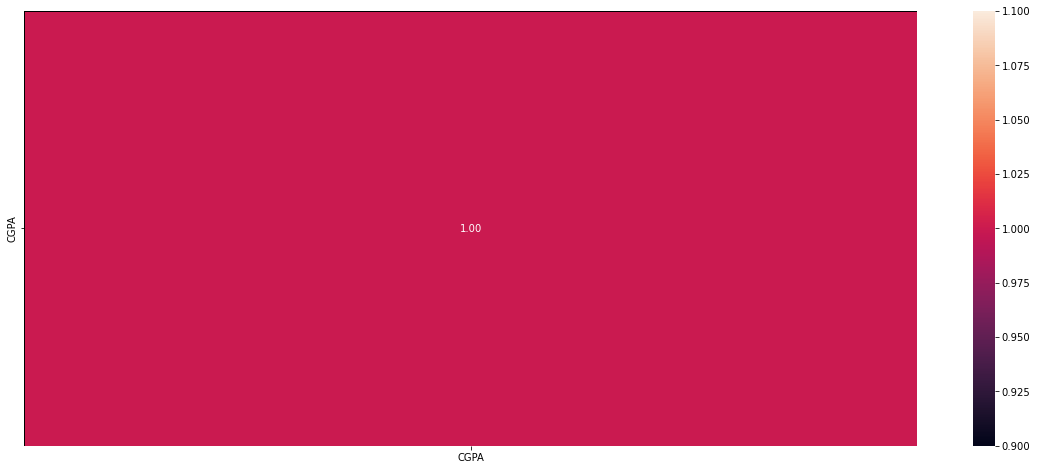

In [21]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')

In [22]:
#lets seprate data
features=['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412']
label=['CGPA']

X=df[features]
y=df[label]

In [23]:
type(y)

pandas.core.frame.DataFrame

Now we will go for model accuracy by applying different methods

In [30]:
# importing some important libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,f1_score, precision_score, recall_score, roc_curve, auc, average_precision_score, roc_auc_score, accuracy_score, precision_recall_curve, f1_score
from sklearn.datasets import make_regression
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import KFold
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)


In [28]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy=0.5)

In [29]:
# define dataset
X, y = make_regression(n_samples=213)
# summarize class distribution
print(Counter(y))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='auto')


Counter({92.6962143271017: 1, 71.95526056680112: 1, -48.681683760913046: 1, -203.79678308836844: 1, -88.18357797858924: 1, -72.6887705801806: 1, 1.2242295750126004: 1, -268.04493696411316: 1, 181.10780505903892: 1, -7.913313516155185: 1, 192.14359176771302: 1, 322.87397079500954: 1, -233.08934487630114: 1, 165.10851250480417: 1, 507.57626062234385: 1, 132.68249221007844: 1, -281.9031548701545: 1, -272.28377290260664: 1, -251.0303300269911: 1, 11.254466816924818: 1, 231.10713099632483: 1, 67.9524838253941: 1, -175.32981347635277: 1, 39.21465703578172: 1, 152.081809402493: 1, 383.3727954391575: 1, 23.411932215477417: 1, -259.78629097005955: 1, -337.5083619658501: 1, 192.94231304754805: 1, -108.11752242483794: 1, 106.72276832318889: 1, 94.20785808843942: 1, -60.673265268163576: 1, 229.34001002170504: 1, 5.759763710657975: 1, -222.1937949094547: 1, -169.01051874190966: 1, 286.89572304461683: 1, 27.244269359198626: 1, 94.26971453890881: 1, -135.5901036254591: 1, 234.63158751103438: 1, 93.29